# Topic 6 Decompositions (Lessons 3 to 5)

# Lesson 3: Seasonality revisited

## 1 Uncovering Seasonality

Seasonality is repeated periodic behaviour. We will use a fast fourier transform to find that behaviour. In following lectures, I will briefly explain what a fourier transform does. I will not explain what the implementation that is a fast fourier transform. It is something that is well worth knowing: it is one of the cornerstones of the modern technological world.  

For now, we only need to know the following:
* a fourier transform maps a function from a time-based domain to a frequency-based one
* where there is a spike, that is, where we have a dominant frequency, we have found a periodicity
* The period is the length of the axis (the number of observations) divided by that dominant frequency.


We are using it to find periodic behaviour. That will help us decompose our
series into trend, seasonal, and residue components. Then we will forecast each separately.

We are going to use our CO2 data. Remember this is monthly CO2 data. We can guess that there is a period 12 regularity. Let’s see if the fast fourier transform finds it.

We will read in the data and do our thing: make a dataframe with one data column, called Observed, and a time-based index.


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
co2_df = pd.read_csv('/content/drive/MyDrive/Jupyter/JupyterDSM120/data/CO2_monthly.csv')
co2_df.index = pd.to_datetime(co2_df['Date'])
co2_df = co2_df['Interpolated'].rename('Observed')
co2_df

Date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
               ...  
2018-05-01    411.24
2018-06-01    410.79
2018-07-01    408.71
2018-08-01    406.99
2018-09-01    405.51
Name: Observed, Length: 727, dtype: float64

<Axes: xlabel='Date'>

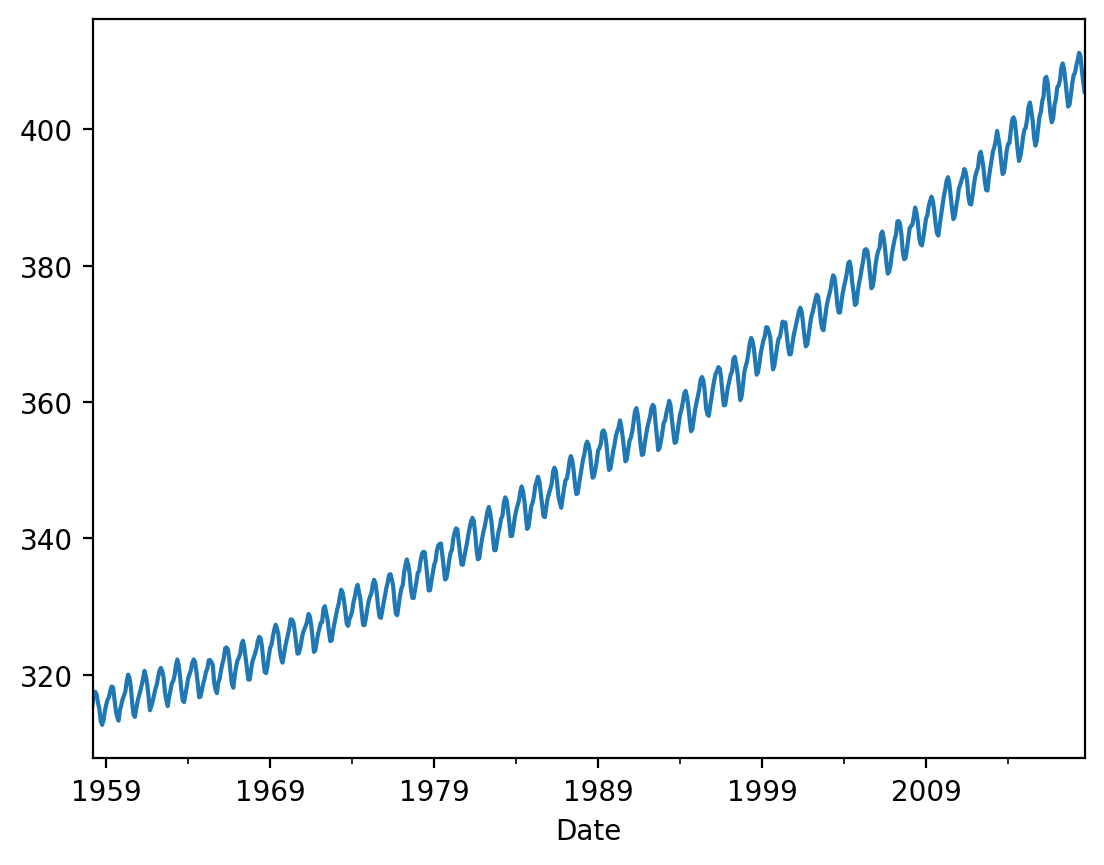

In [ ]:
plt.rcParams['figure.dpi'] = 200
co2_df.plot()

The jagged, saw-tooth pattern is the seasonality. But let’s see of the fast fourier transform can find it. The fast fourier transform that we will be using lives in numpy. And in fact it lives in a fast-fourier transform part of numpy. So to call it we use the strange-looking
* np.fft.fft((co2_df))

Here is a bit of a mathematical thing. Sorry. We are actually dealing with complex numbers. So we will have to take the absolute value to get us to real numbers. If we do not, we will get a real number, but it will be the one that you get by throwing away the imaginary part. Think of a complex number as a point in the plain.

The absolute value is the distance form that point to the
origin. That is what we want. What we get if we do not remember to take the absolute value is the distance in the x-dimension only, ignoring the y. So the expression above now looks like:
* np.abs(np.fft.fft((co2_df)))


Next: To avoid any funny business in the beginning I am going to start from 10. And I am only going to go halfway up the series. That will make the behaviour of the graph easier to read. Those two things are encapsulated in the phrase [10:len(co2_df)//2] Leading to the whole line of code

* co2_fft = np.abs(np.fft.fft((co2_df)))[10:len(co2_df)//2]




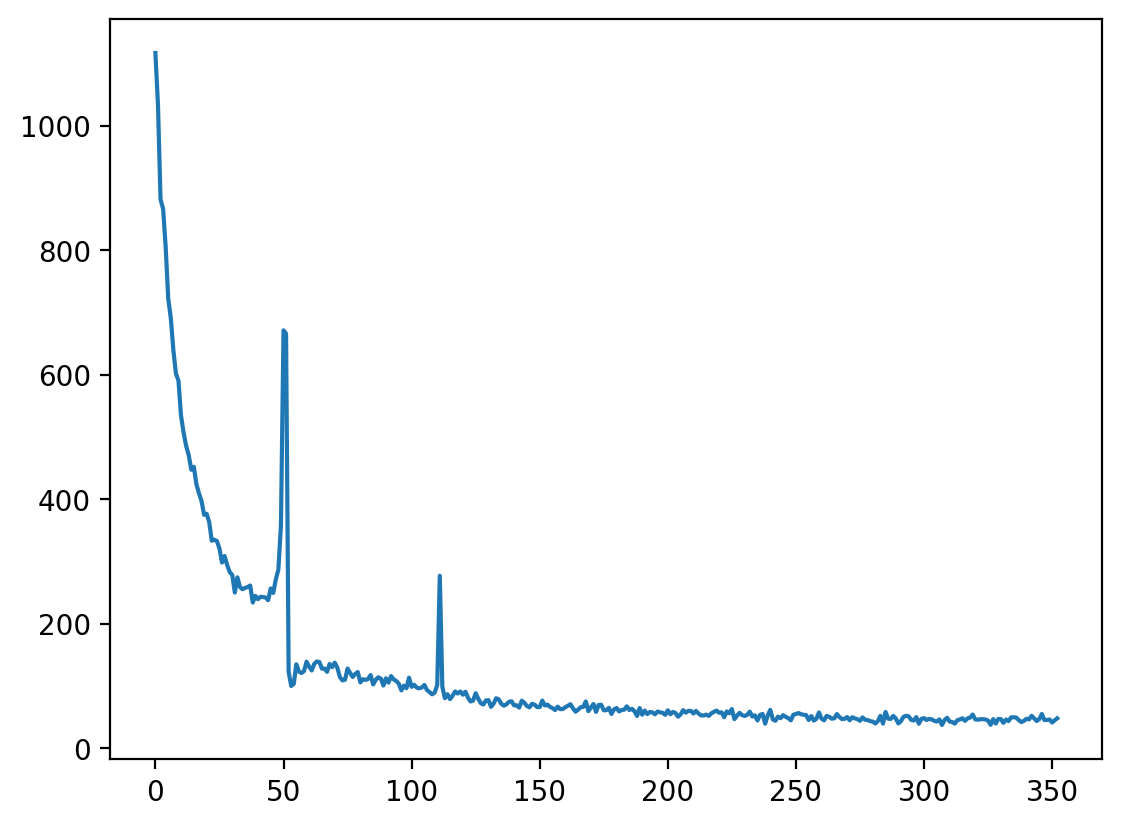

In [ ]:
co2_fft = np.abs(np.fft.fft((co2_df)))[10:len(co2_df)//2]
plt.plot(co2_fft)

Notice that lovely spike at about 50. The spike at the beginning is to be ignored. Now remember that we started at 10 so the 50 is really 60. Remember, too, that there were 727 rows. I told you we would need that. We are now ready.
The period of the regularity at period 727/60 or 12.11. Aha! but we knew there would be one.


This comes out even clearer if we start with 20 and only plot an 8th of the series



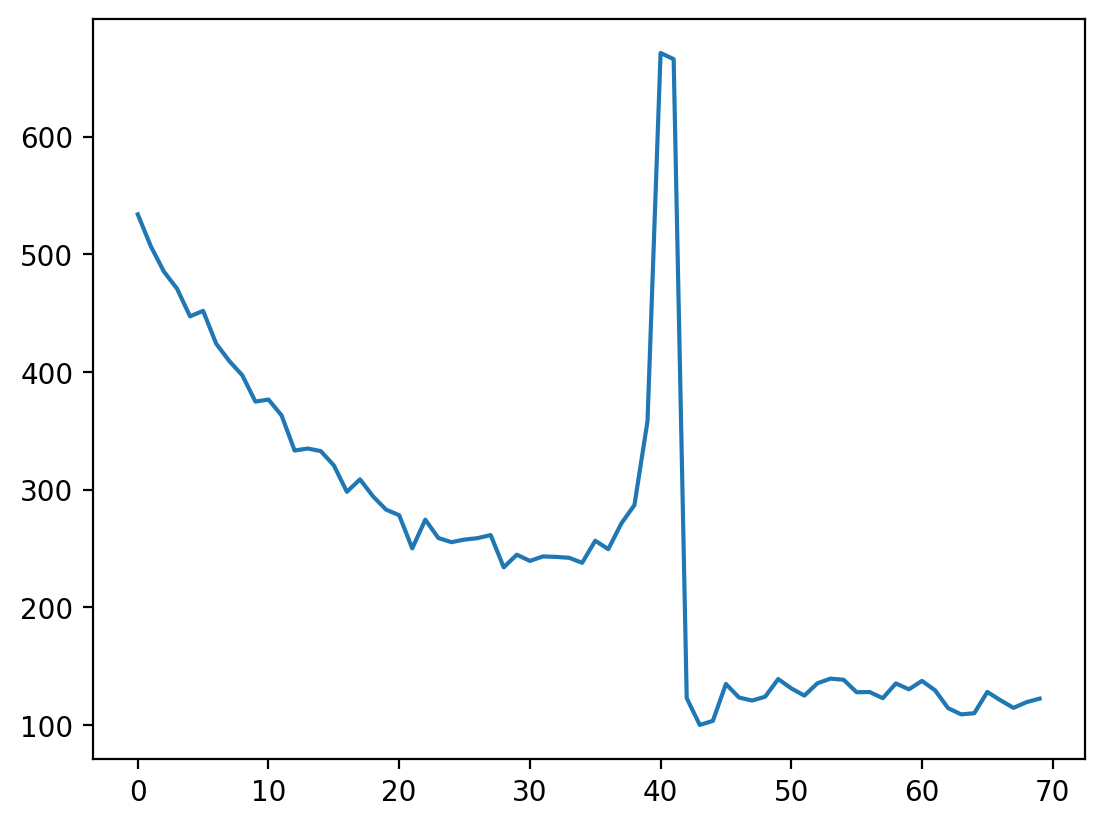

In [ ]:
dff1 = np.abs(np.fft.fft((co2_df)))[20:len(co2_df)//8]
plt.plot(dff1)

Let’s try something we don’t know. We will look at the sunspot data. I am chuffed by this one because I did not know it was seasonal before I did this calculation.

In [ ]:
sunspots_df = sm.datasets.sunspots.load_pandas().data
sunspots_df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


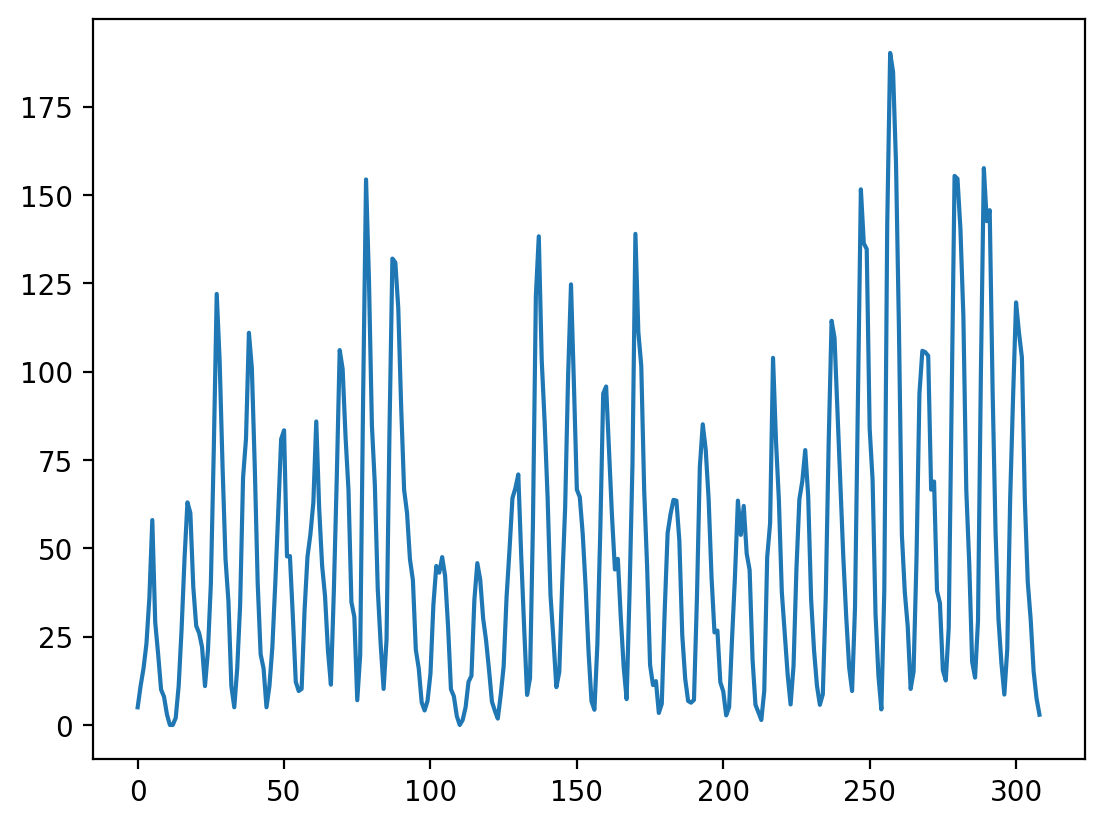

In [ ]:
plt.plot(sunspots_df['SUNACTIVITY'])
plt.show()

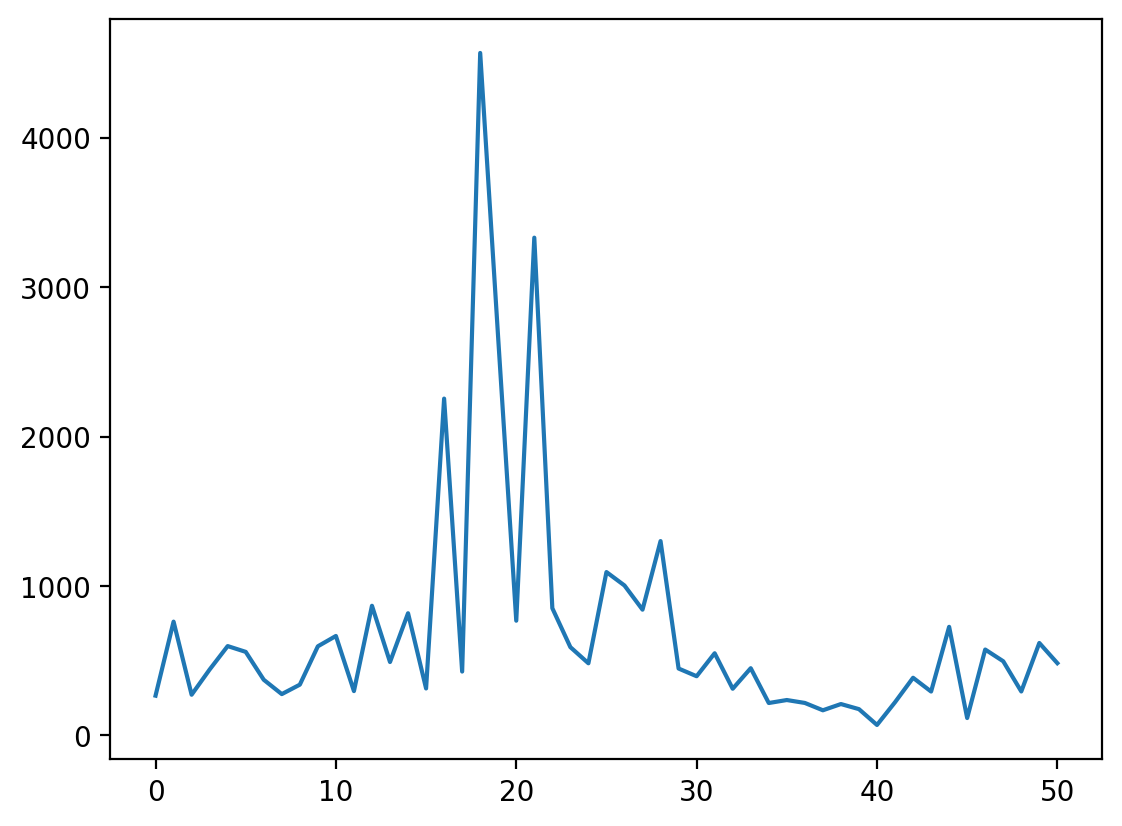

In [ ]:
sunspots_fft = np.abs(np.fft.fft(sunspots_df['SUNACTIVITY'])[10:len(sunspots_df)//5])
plt.plot(sunspots_fft )

The spike is at about 18. Again we started at 10. So 28. The number of rows in the data was 308.
So we get the period by dividing 308 by 11.



In [ ]:
308/28

11.0

**Use the fast fourier transform to find or reenforce seasonality in some of your data.**

# Lesson 4: Fourier transforms

In this lesson, we learn about the fourier transform principle and explore the FFT implementation. A deep understanding of the fourier transformation is not necessary for this module. The explanation is here as cultural background. You should not worry if you find it hard to understand.



# Lesson 5: Forecasting with decompositions and transformations

In this lesson, we will learn how to use Lo(w)ess in a powerful decomposition and use it in two extended examples: one additive and one multiplicative

## 1 STL Example 1:

We are now ready to do a decomposition including the seasonality. The decomposition we will use is STL, as described before. We are not implementing our own STL but rather using the statsmodel one. In this lecture we will be using the CO2 data as our testcase. The way this lecture will go is
that we will set up the apparatus we need and then do an AR model of CO2 all at once. We will then use the STL decomposition, do the predictions separately and then put them together. We will compare the results of the decomposed prediction and the original intact prediction. With any luck, the decomposed one wil be better.


https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html



In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import matplotlib as pt

plt.rcParams['figure.dpi'] = 150
co2_df = pd.read_csv('/content/drive/MyDrive/Jupyter/JupyterDSM120/data/CO2_monthly.csv')
co2_df.index = pd.to_datetime(co2_df['Date'])
co2_df = co2_df['Interpolated'].rename('Observed').to_frame()
co2_df

,Observed
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
...,...
2018-05-01,411.24
2018-06-01,410.79
2018-07-01,408.71


<Axes: xlabel='Date'>

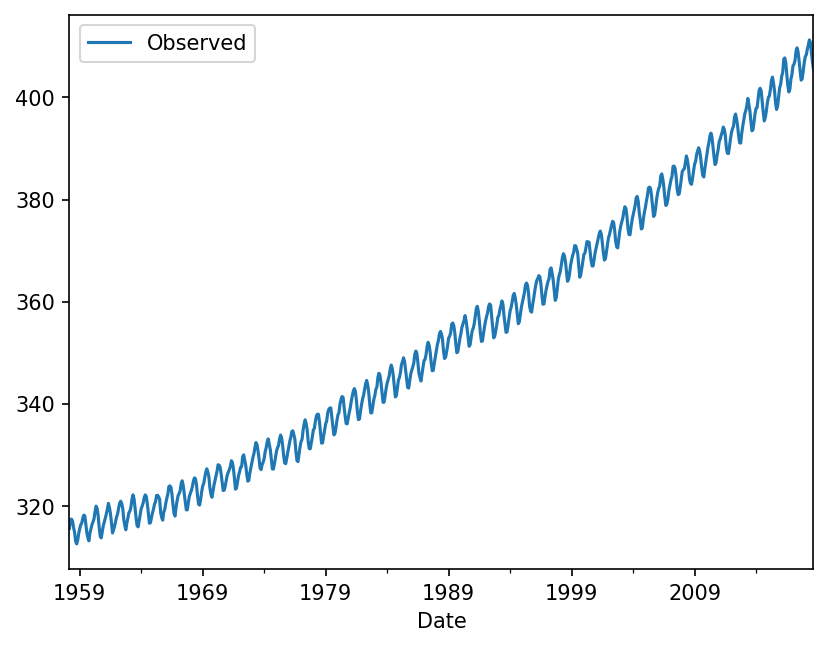

In [ ]:
co2_df.plot()

In [ ]:
def rmse(predicted, actual):
    diffs = predicted - actual
    return math.sqrt((diffs ** 2).sum()) / len(diffs.dropna())



In [ ]:
def train_ar(values, order):
    target_vector = np.array(values[order:])
    lagged_values = []
    for i in range(len(values) - order):
        lagged_values.append(values[i:i+order])
    design_matrix = np.array(lagged_values)
    return np.linalg.inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ target_vector



In [ ]:
def predict(coeffs, data):
    predicted_values = [math.nan] * len(coeffs)
    for i in range(len(coeffs), len(data)):
        predicted_values.append(np.dot(coeffs, data[i-len(coeffs):i]))
    return np.array(predicted_values)



Having got that out of the way, let’s do an AR prediction for the CO2 data. We will start by doing the pacf calculation to guide the choice of the order.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


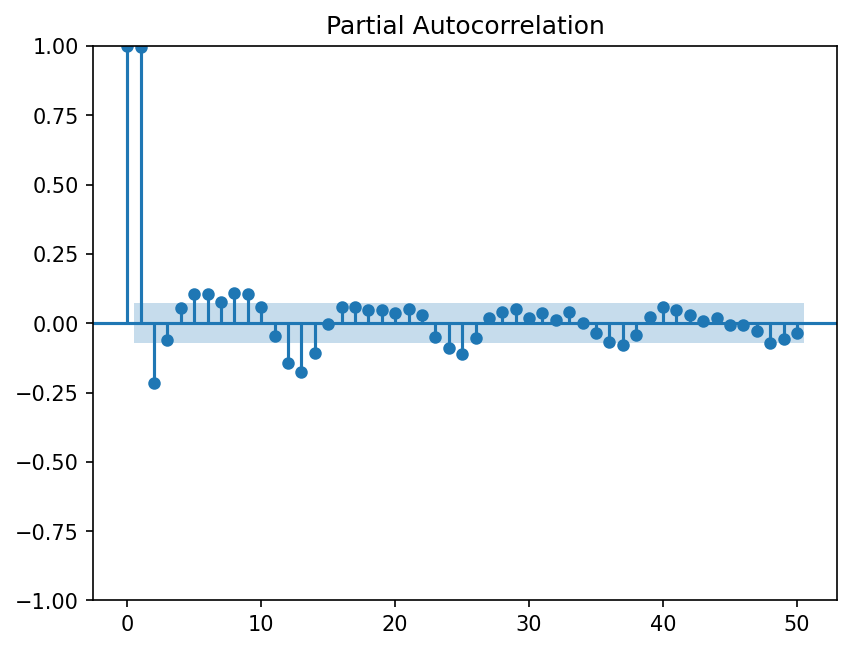

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(co2_df['Observed'], lags=50) # use a variable to prevent double plotting

There would be an argument for a simple AR(2) model. But there is also one for an AR(13). Let’s go with that to give this attempt a good chance

In [ ]:
coeffs = train_ar(co2_df['Observed'],13)
ar_predict_whole = predict(coeffs, co2_df['Observed'])
ar_rmse = rmse(ar_predict_whole, co2_df['Observed'])
print("RMSE from AR3(13)", ar_rmse)

RMSE from AR3(13) 0.01342697913979767


Now, let’s decompose using the statsmodel STL function. The function lives in
statsmodels.tsa.seasonal The tsa means time series analysis and the seasonal is self-explanatory.  

Then it is easy to call STL.  
```python
co2_decomposed = STL(co2_df[‘Observed’]).fit()
```
co2_decomposed is an object with data that includes the trend, seasonal, and resid.  
We will look at each in turn.

In [ ]:
from statsmodels.tsa.seasonal import STL
co2_decomposed = STL(co2_df['Observed']).fit()

co2_trend = co2_decomposed.trend
co2_seasonal = co2_decomposed.seasonal
co2_resid = co2_decomposed.resid

<Axes: xlabel='Date'>

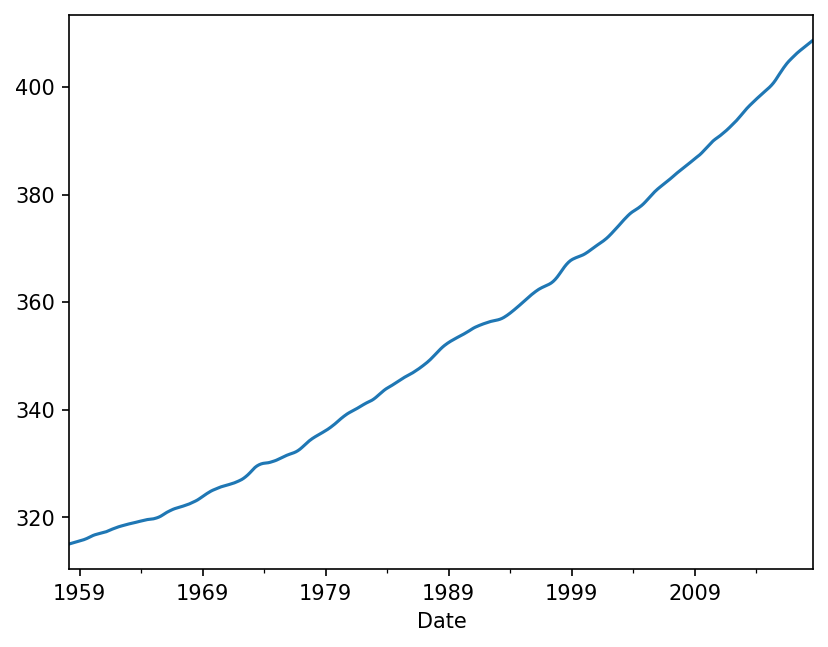

In [ ]:
co2_trend.plot()

That looks pretty smooth. Now let’s look at the seasonal component.

<Axes: xlabel='Date'>

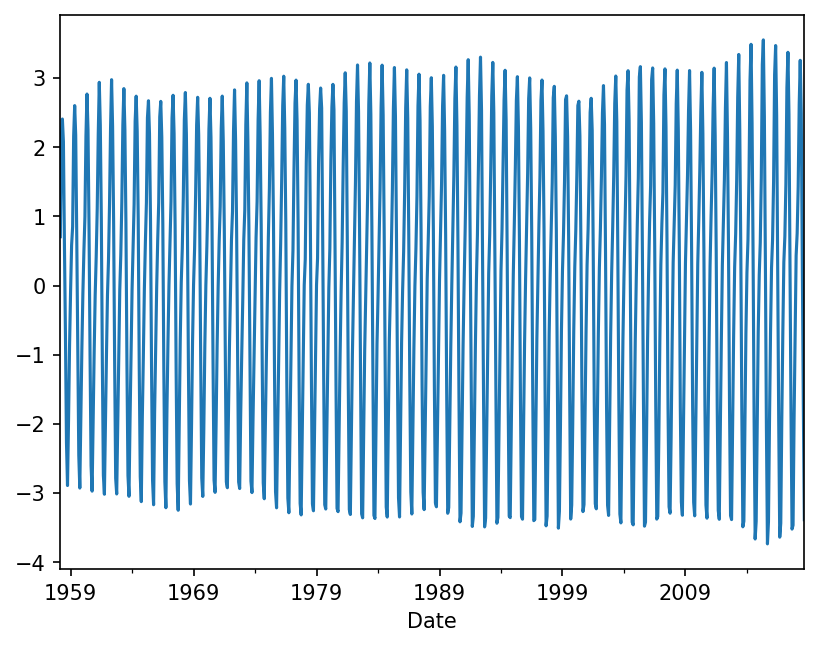

In [ ]:
co2_seasonal.plot()

Notice the trend is gone there. Now the residual.

<Axes: xlabel='Date'>

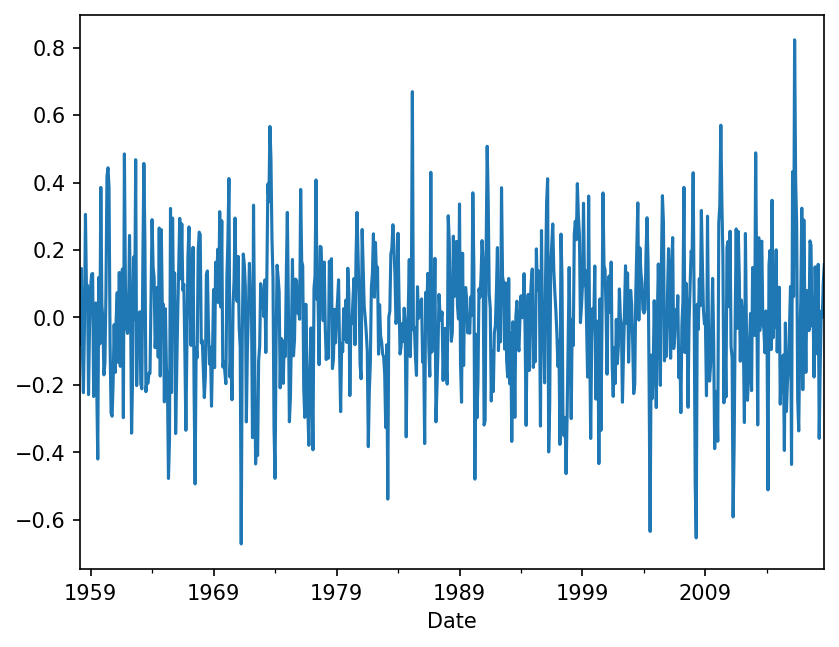

In [ ]:
co2_resid.plot()

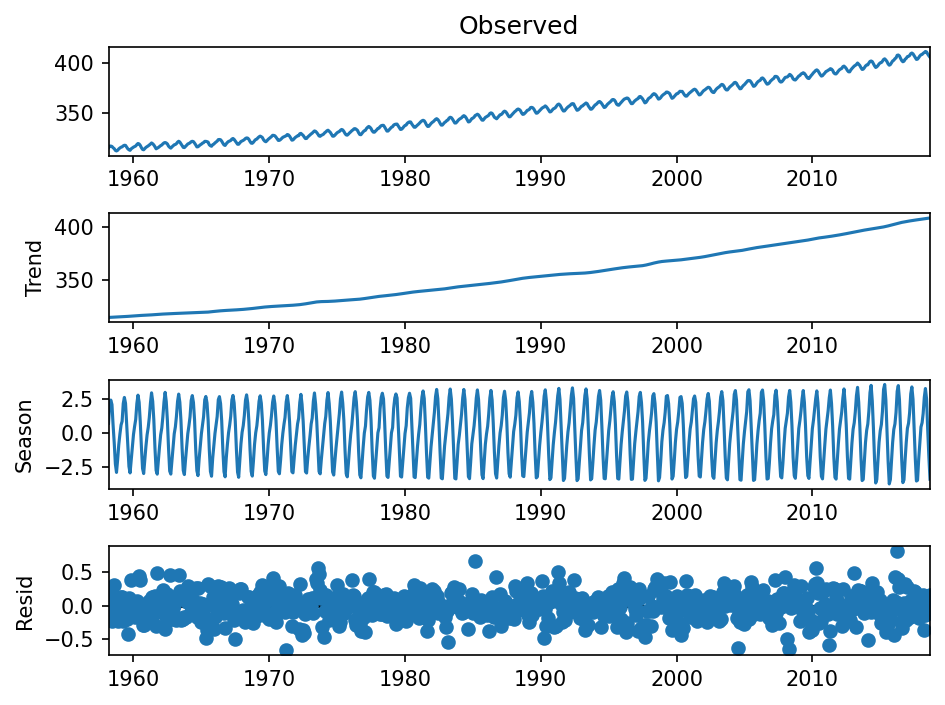

In [ ]:
decomp = co2_decomposed.plot() # use a variable to prevent double plotting

Now we will predict 1 by 1. We will start with the trend. Which we will do as naive differences. We have now explained this several times.

<Axes: xlabel='Date'>

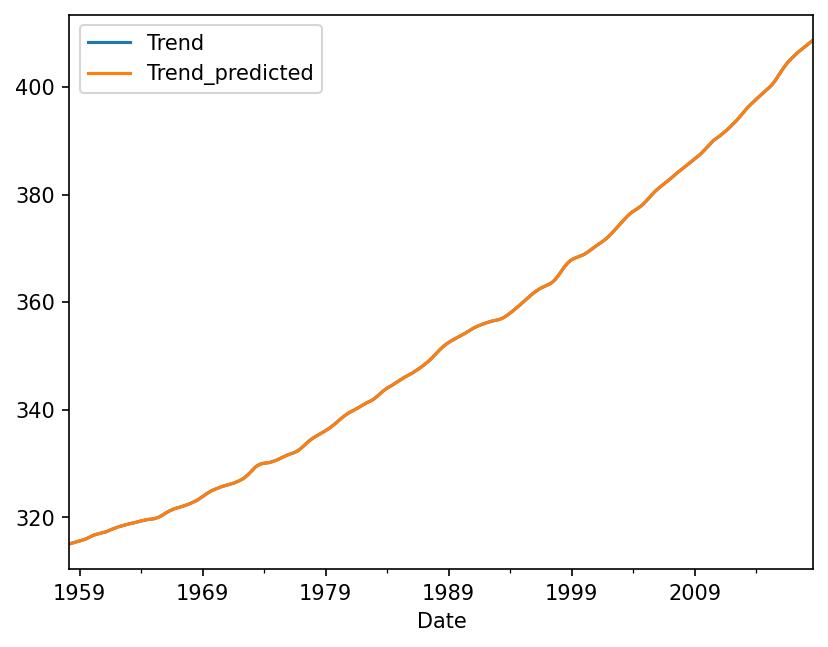

In [ ]:
predicted_trend = 2 * co2_trend.shift(1) - co2_trend.shift(2) # naive differences
frame = { 'Trend': co2_trend, 'Trend_predicted': predicted_trend }
trend_df = pd.DataFrame(frame)
trend_df.plot()

We will now predict the seasonal component, using seasonal naive prediction. Remember that seasonal naive is just like naive except instead of the one just before you use the one that lags by the period of the seasonality. IN this case that is 12

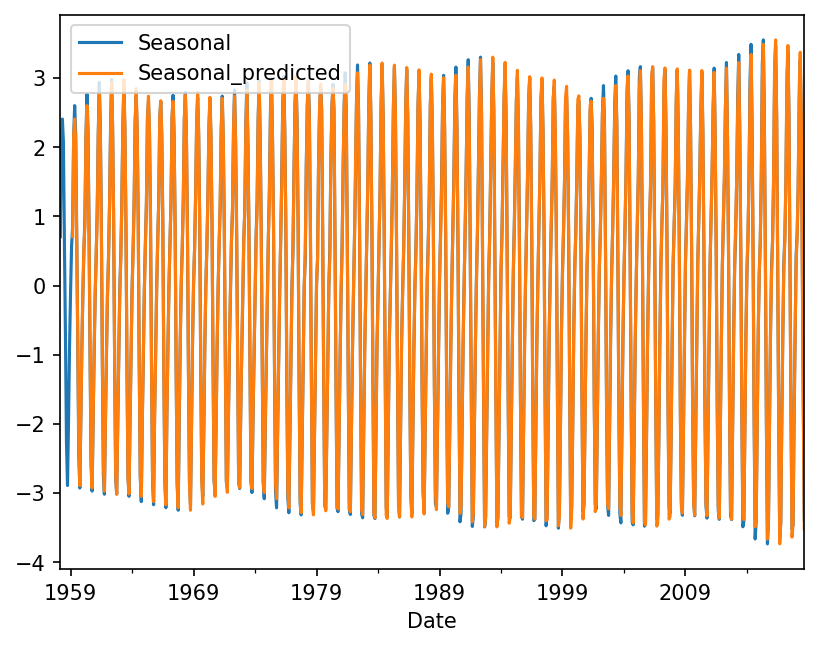

In [ ]:
predicted_seasonal = co2_seasonal.shift(12) # seasonal naive
frame = {'Seasonal': co2_seasonal, 'Seasonal_predicted': predicted_seasonal}
seasonal_df = pd.DataFrame(frame)
seasons = seasonal_df.plot()

We will predict the residual using an AR model. We will first use plot a PACF to inform our model choice.

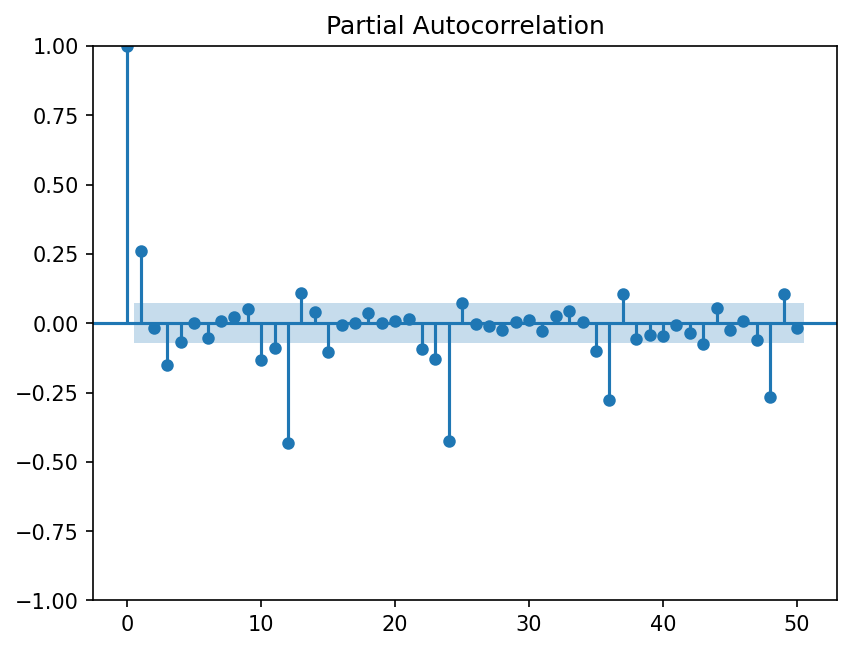

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(co2_resid, lags=50)


13 looks a good choice again. We will train and predict.

In [ ]:
co2_resid_arcoefs = train_ar(co2_resid,13)
predicted_resid = predict(co2_resid_arcoefs,co2_resid)
co2_resid_arcoefs

array([ 0.11110132, -0.45186394,  0.02271583, -0.0861422 ,  0.0343905 ,
       -0.03086636, -0.00285762, -0.07955493,  0.01389352, -0.08025906,
       -0.08392   , -0.01692068,  0.25778668])

<Axes: xlabel='Date'>

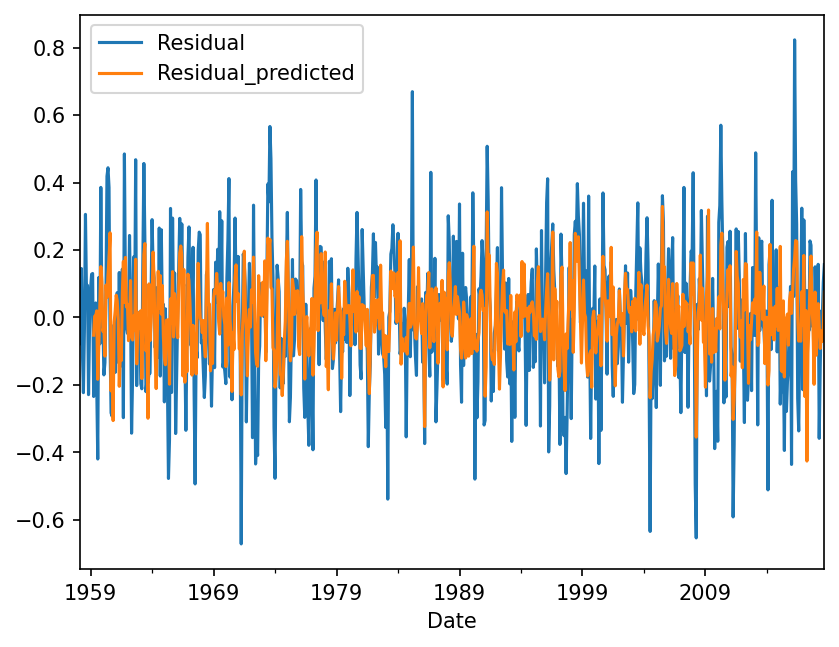

In [ ]:
frame = {'Residual': co2_resid, 'Residual_predicted': predicted_resid}
residual_df = pd.DataFrame(frame)
residual_df.plot()

In [ ]:
trend_rmse = rmse(predicted_trend, co2_trend)
seasonal_rmse = rmse(predicted_seasonal, co2_seasonal)
resid_rmse = rmse(predicted_resid, co2_resid)
print("Component RMSE: trend", trend_rmse, ", seasonal", seasonal_rmse,
      ",resid", resid_rmse)
print("Combined RMSE",
      rmse(predicted_trend + predicted_seasonal + predicted_resid,
           co2_df['Observed']))
# print("RMSE from AR3(12)", ar_rmse)

Component RMSE: trend 0.00025576245322943807 , seasonal 0.002641919464274233 ,resid 0.006409468592341632
Combined RMSE 0.006856554820550421


In [ ]:
co2_df['Predicted'] = predicted_trend + predicted_seasonal + predicted_resid
co2_df

,Observed,Predicted
Date,,
1958-03-01,315.71,NaN
1958-04-01,317.45,NaN
1958-05-01,317.50,NaN
1958-06-01,317.10,NaN
1958-07-01,315.86,NaN
...,...,...
2018-05-01,411.24,411.409080
2018-06-01,410.79,410.713421
2018-07-01,408.71,408.646897


<Axes: xlabel='Date'>

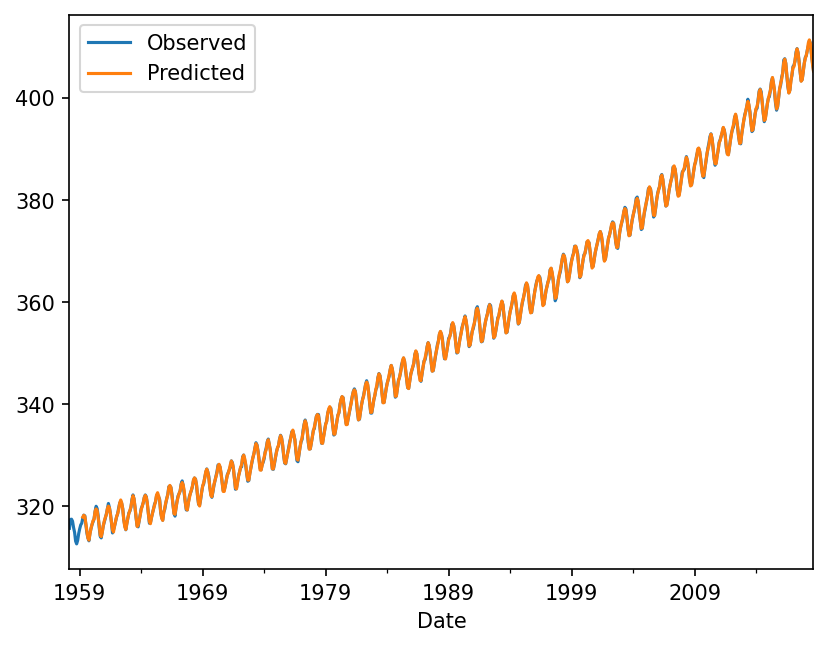

In [ ]:
co2_df.plot()

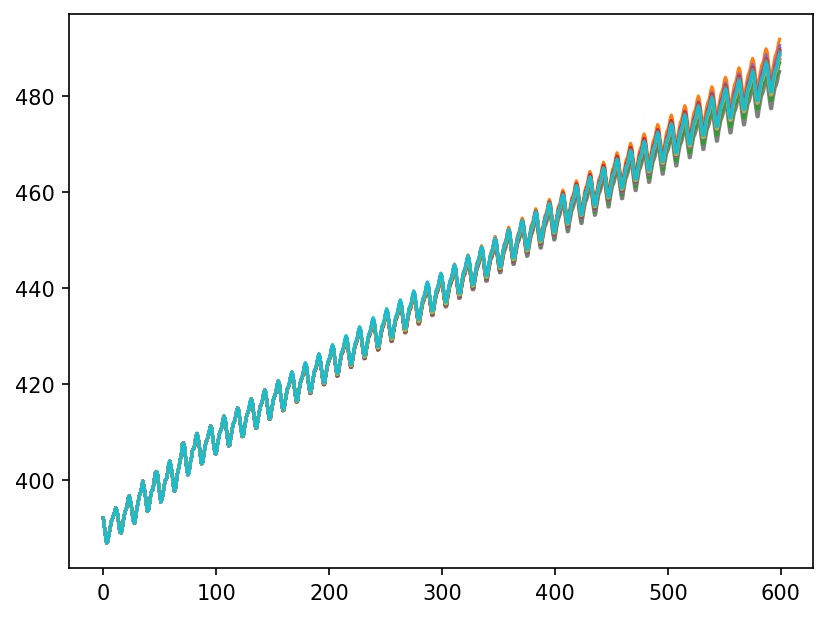

In [ ]:
num_samples = 20
trend_trajectories = np.broadcast_to(co2_trend.to_numpy().reshape((-1, 1)),(len(co2_trend), num_samples))
seasonal_trajectories = np.broadcast_to(co2_seasonal.to_numpy().reshape((-1,1)), (len(co2_seasonal), num_samples))
resid_trajectories = np.broadcast_to(co2_resid.to_numpy().reshape((-1, 1)), (len(co2_resid), num_samples))

# resid_coeffs = ar_resid_model.params.values
for i in range(500):
    trend_prediction = 2 * trend_trajectories[-1,:] - trend_trajectories[-2,:]
    next_trend_row = trend_prediction + trend_rmse * np.random.randn(num_samples)
    trend_trajectories = np.append(trend_trajectories, next_trend_row.reshape((1,num_samples)), axis=0)
    seasonal_prediction = seasonal_trajectories[-12,:]
    next_seasonal_row = seasonal_prediction + seasonal_rmse * np.random.randn(num_samples)
    seasonal_trajectories = np.append(seasonal_trajectories, next_seasonal_row.reshape((1,num_samples)), axis=0)
    resid_prediction = co2_resid_arcoefs @ resid_trajectories[-len(co2_resid_arcoefs):,:]
    next_resid_row = resid_prediction + resid_rmse * np.random.randn(num_samples)
    resid_trajectories = np.append(resid_trajectories, next_resid_row.reshape((1,num_samples)), axis=0)
    trajectories = trend_trajectories + seasonal_trajectories + resid_trajectories


_ = plt.plot(trajectories[-600:,:])

In [ ]:
trajectories.shape

(1227, 20)

In [ ]:
trend_trajectories[:2]

array([[315.08210505, 315.08210505, 315.08210505, 315.08210505,
        315.08210505, 315.08210505, 315.08210505, 315.08210505,
        315.08210505, 315.08210505, 315.08210505, 315.08210505,
        315.08210505, 315.08210505, 315.08210505, 315.08210505,
        315.08210505, 315.08210505, 315.08210505, 315.08210505],
       [315.13626839, 315.13626839, 315.13626839, 315.13626839,
        315.13626839, 315.13626839, 315.13626839, 315.13626839,
        315.13626839, 315.13626839, 315.13626839, 315.13626839,
        315.13626839, 315.13626839, 315.13626839, 315.13626839,
        315.13626839, 315.13626839, 315.13626839, 315.13626839]])